## IMPORTING MODULES

In [1]:
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn import metrics
from sklearn.metrics import roc_curve, auc,accuracy_score,confusion_matrix
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import label_binarize, StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from itertools import cycle
from xgboost.sklearn import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# DATA CLEANING && PREPROCESSING

In [4]:
df=pd.read_csv("Advertising.csv")

#### Reading the dataset

In [5]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [6]:
df.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [8]:
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [9]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [10]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [11]:
df.drop(columns='Unnamed: 0',inplace=True)

#### Removing the unnecessary columns...

In [12]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [13]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [14]:
df.shape

(200, 4)

In [15]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


# *DATA VISUALIZATION*

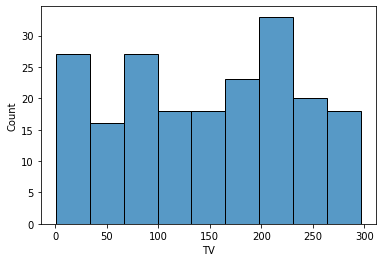

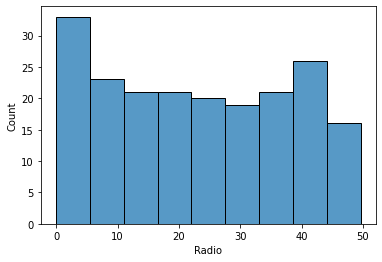

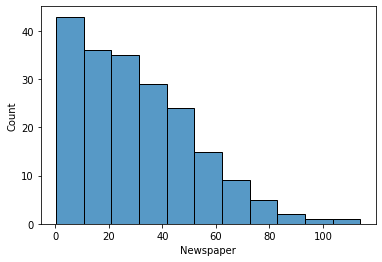

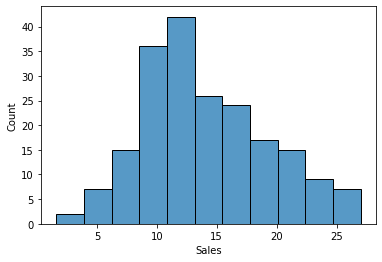

In [16]:
for i in df.columns:
    if df[i].dtype !="object":
        sns.histplot(x=df[i])
        plt.show();

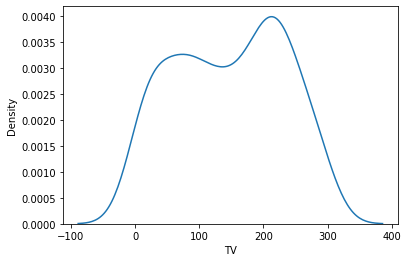

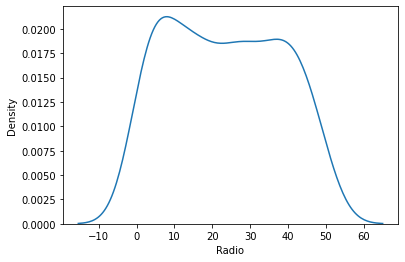

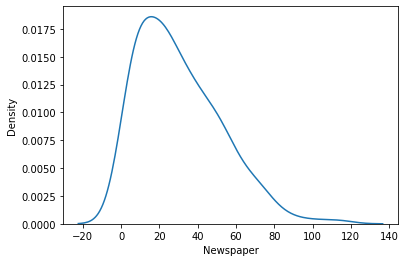

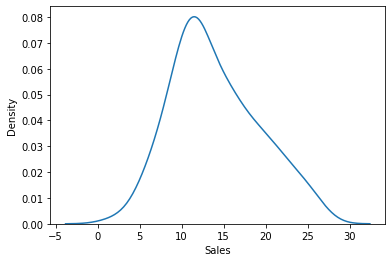

In [17]:
for i in df.columns:
    if df[i].dtype !="object":
        sns.kdeplot(x=df[i])
        plt.show();

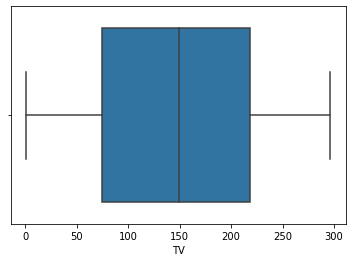

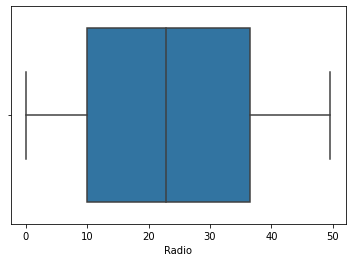

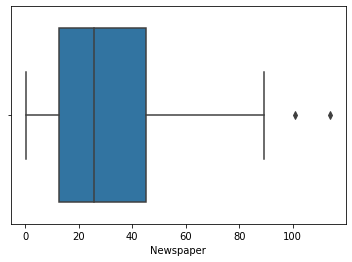

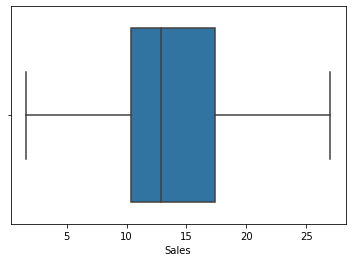

In [18]:
for i in df.columns:
    if df[i].dtype !="object":
        sns.boxplot(x=df[i])
        plt.show();

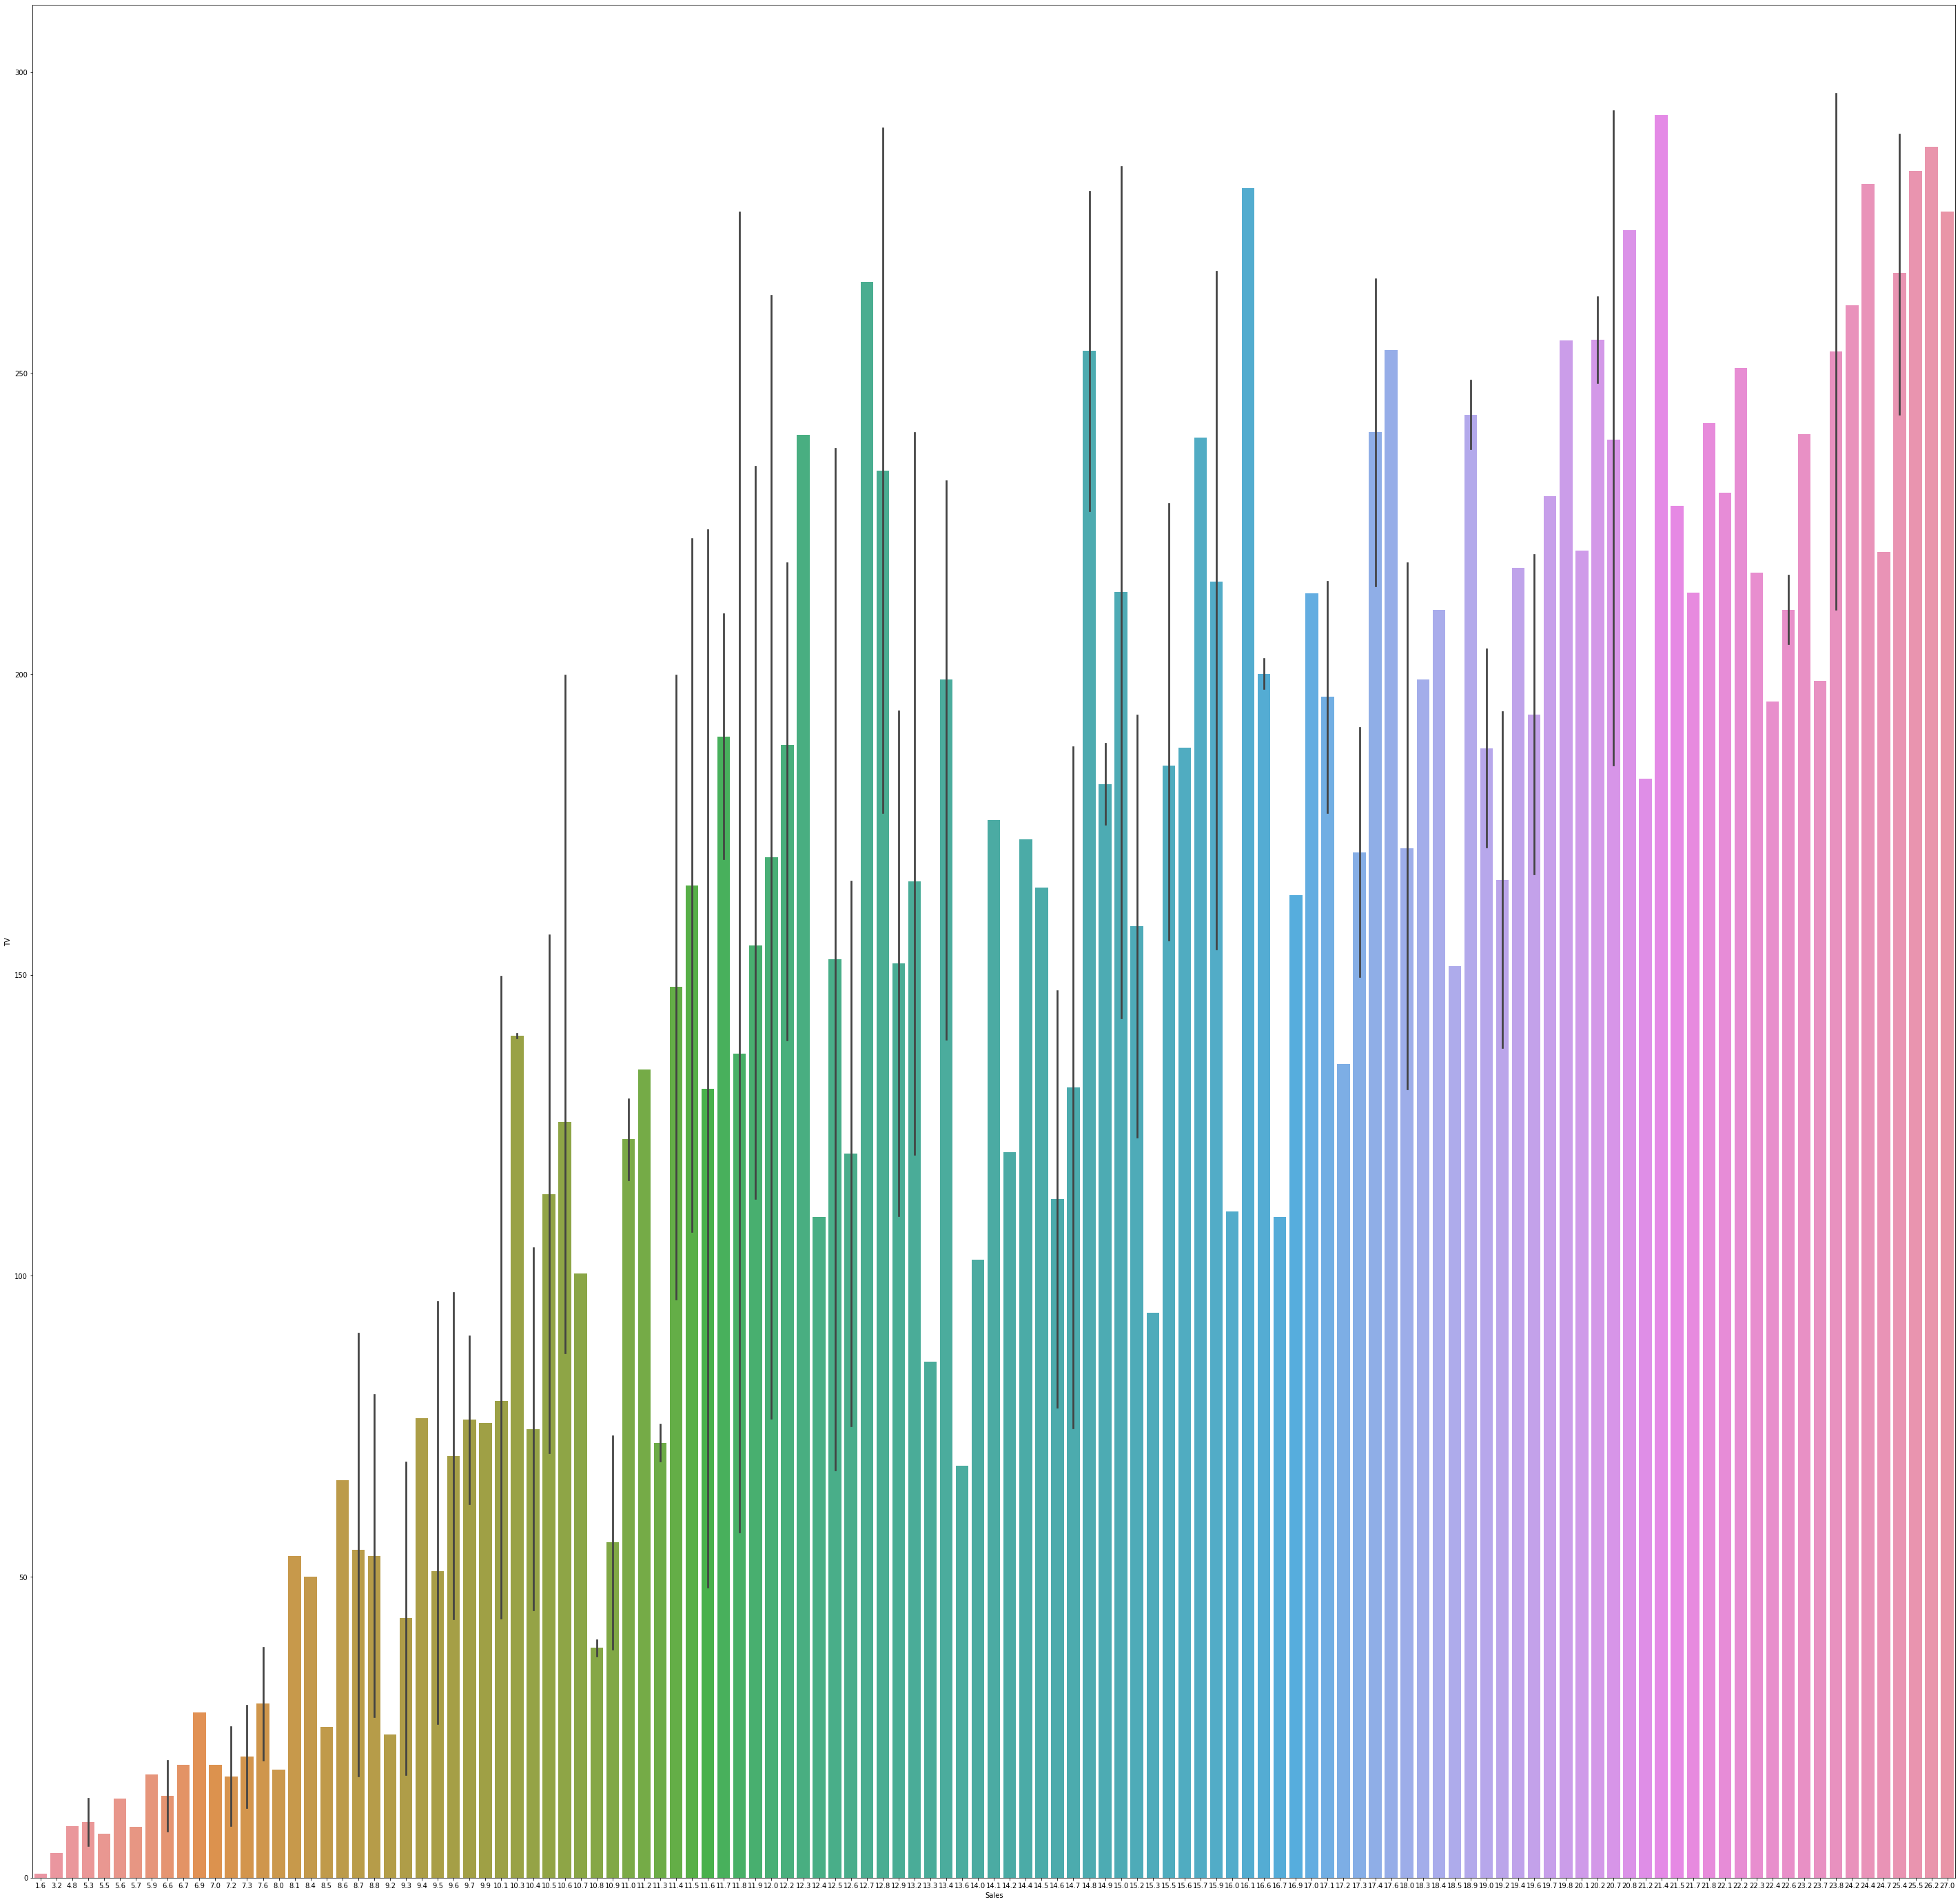

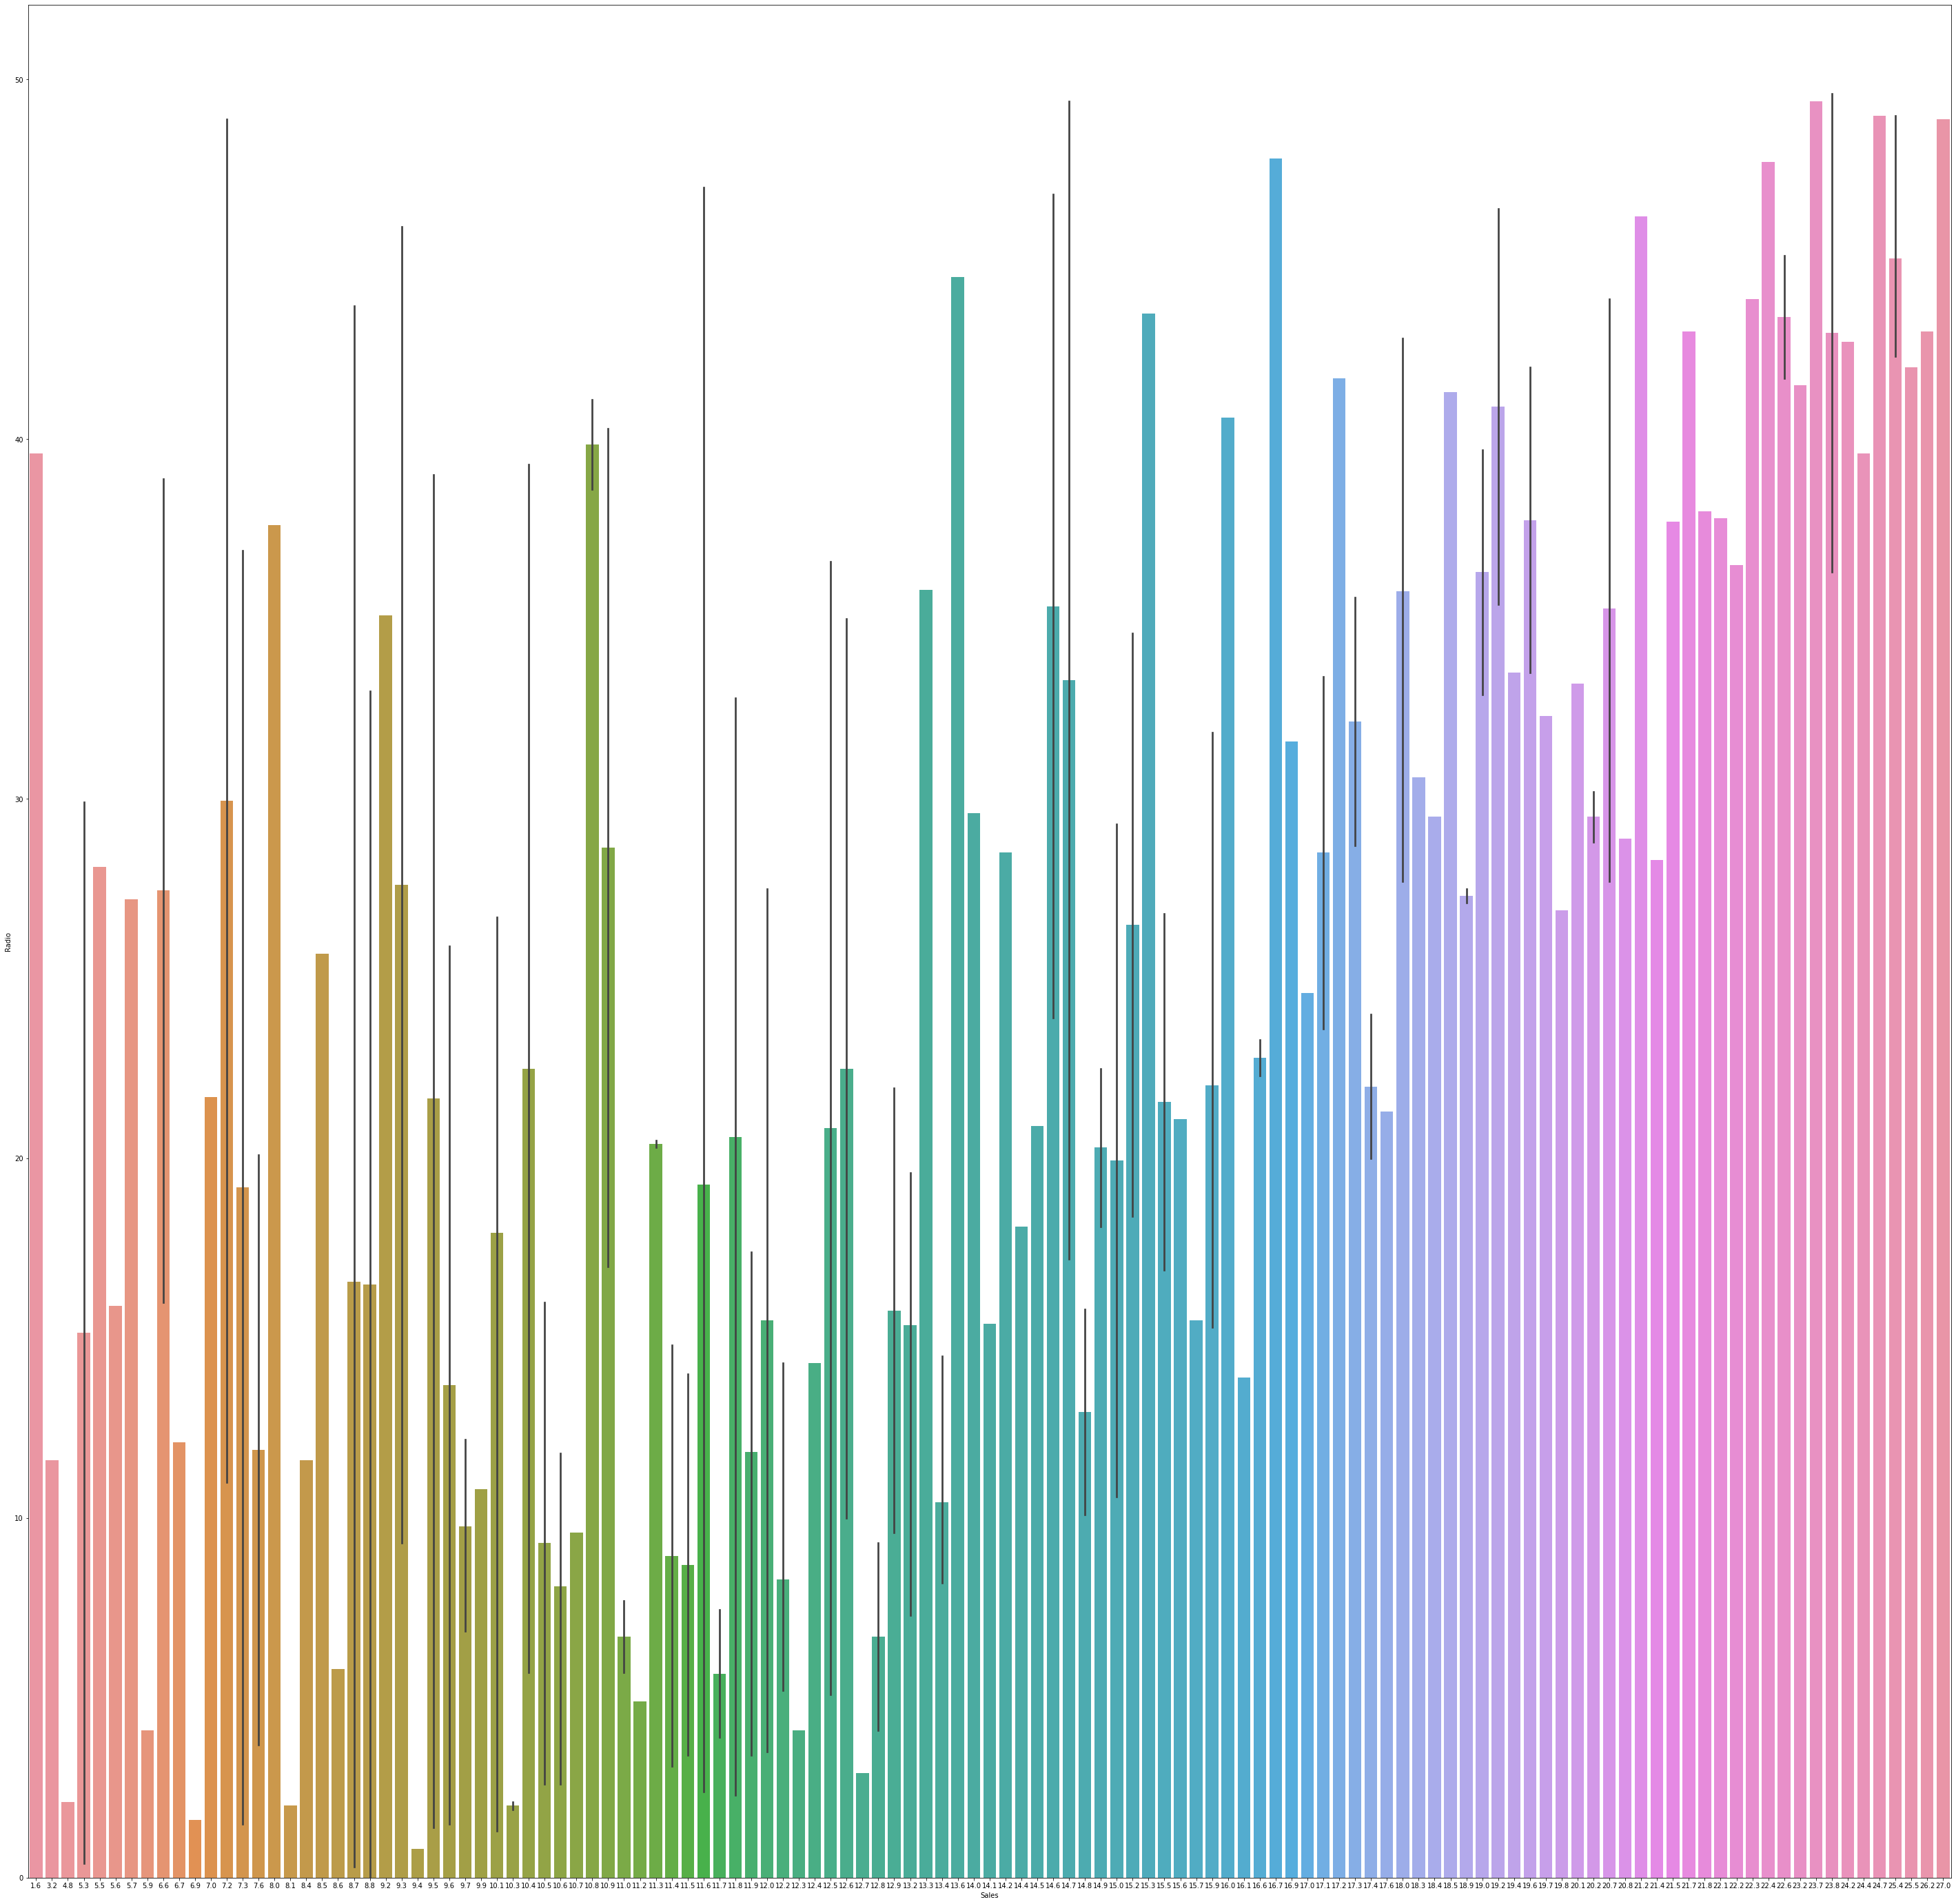

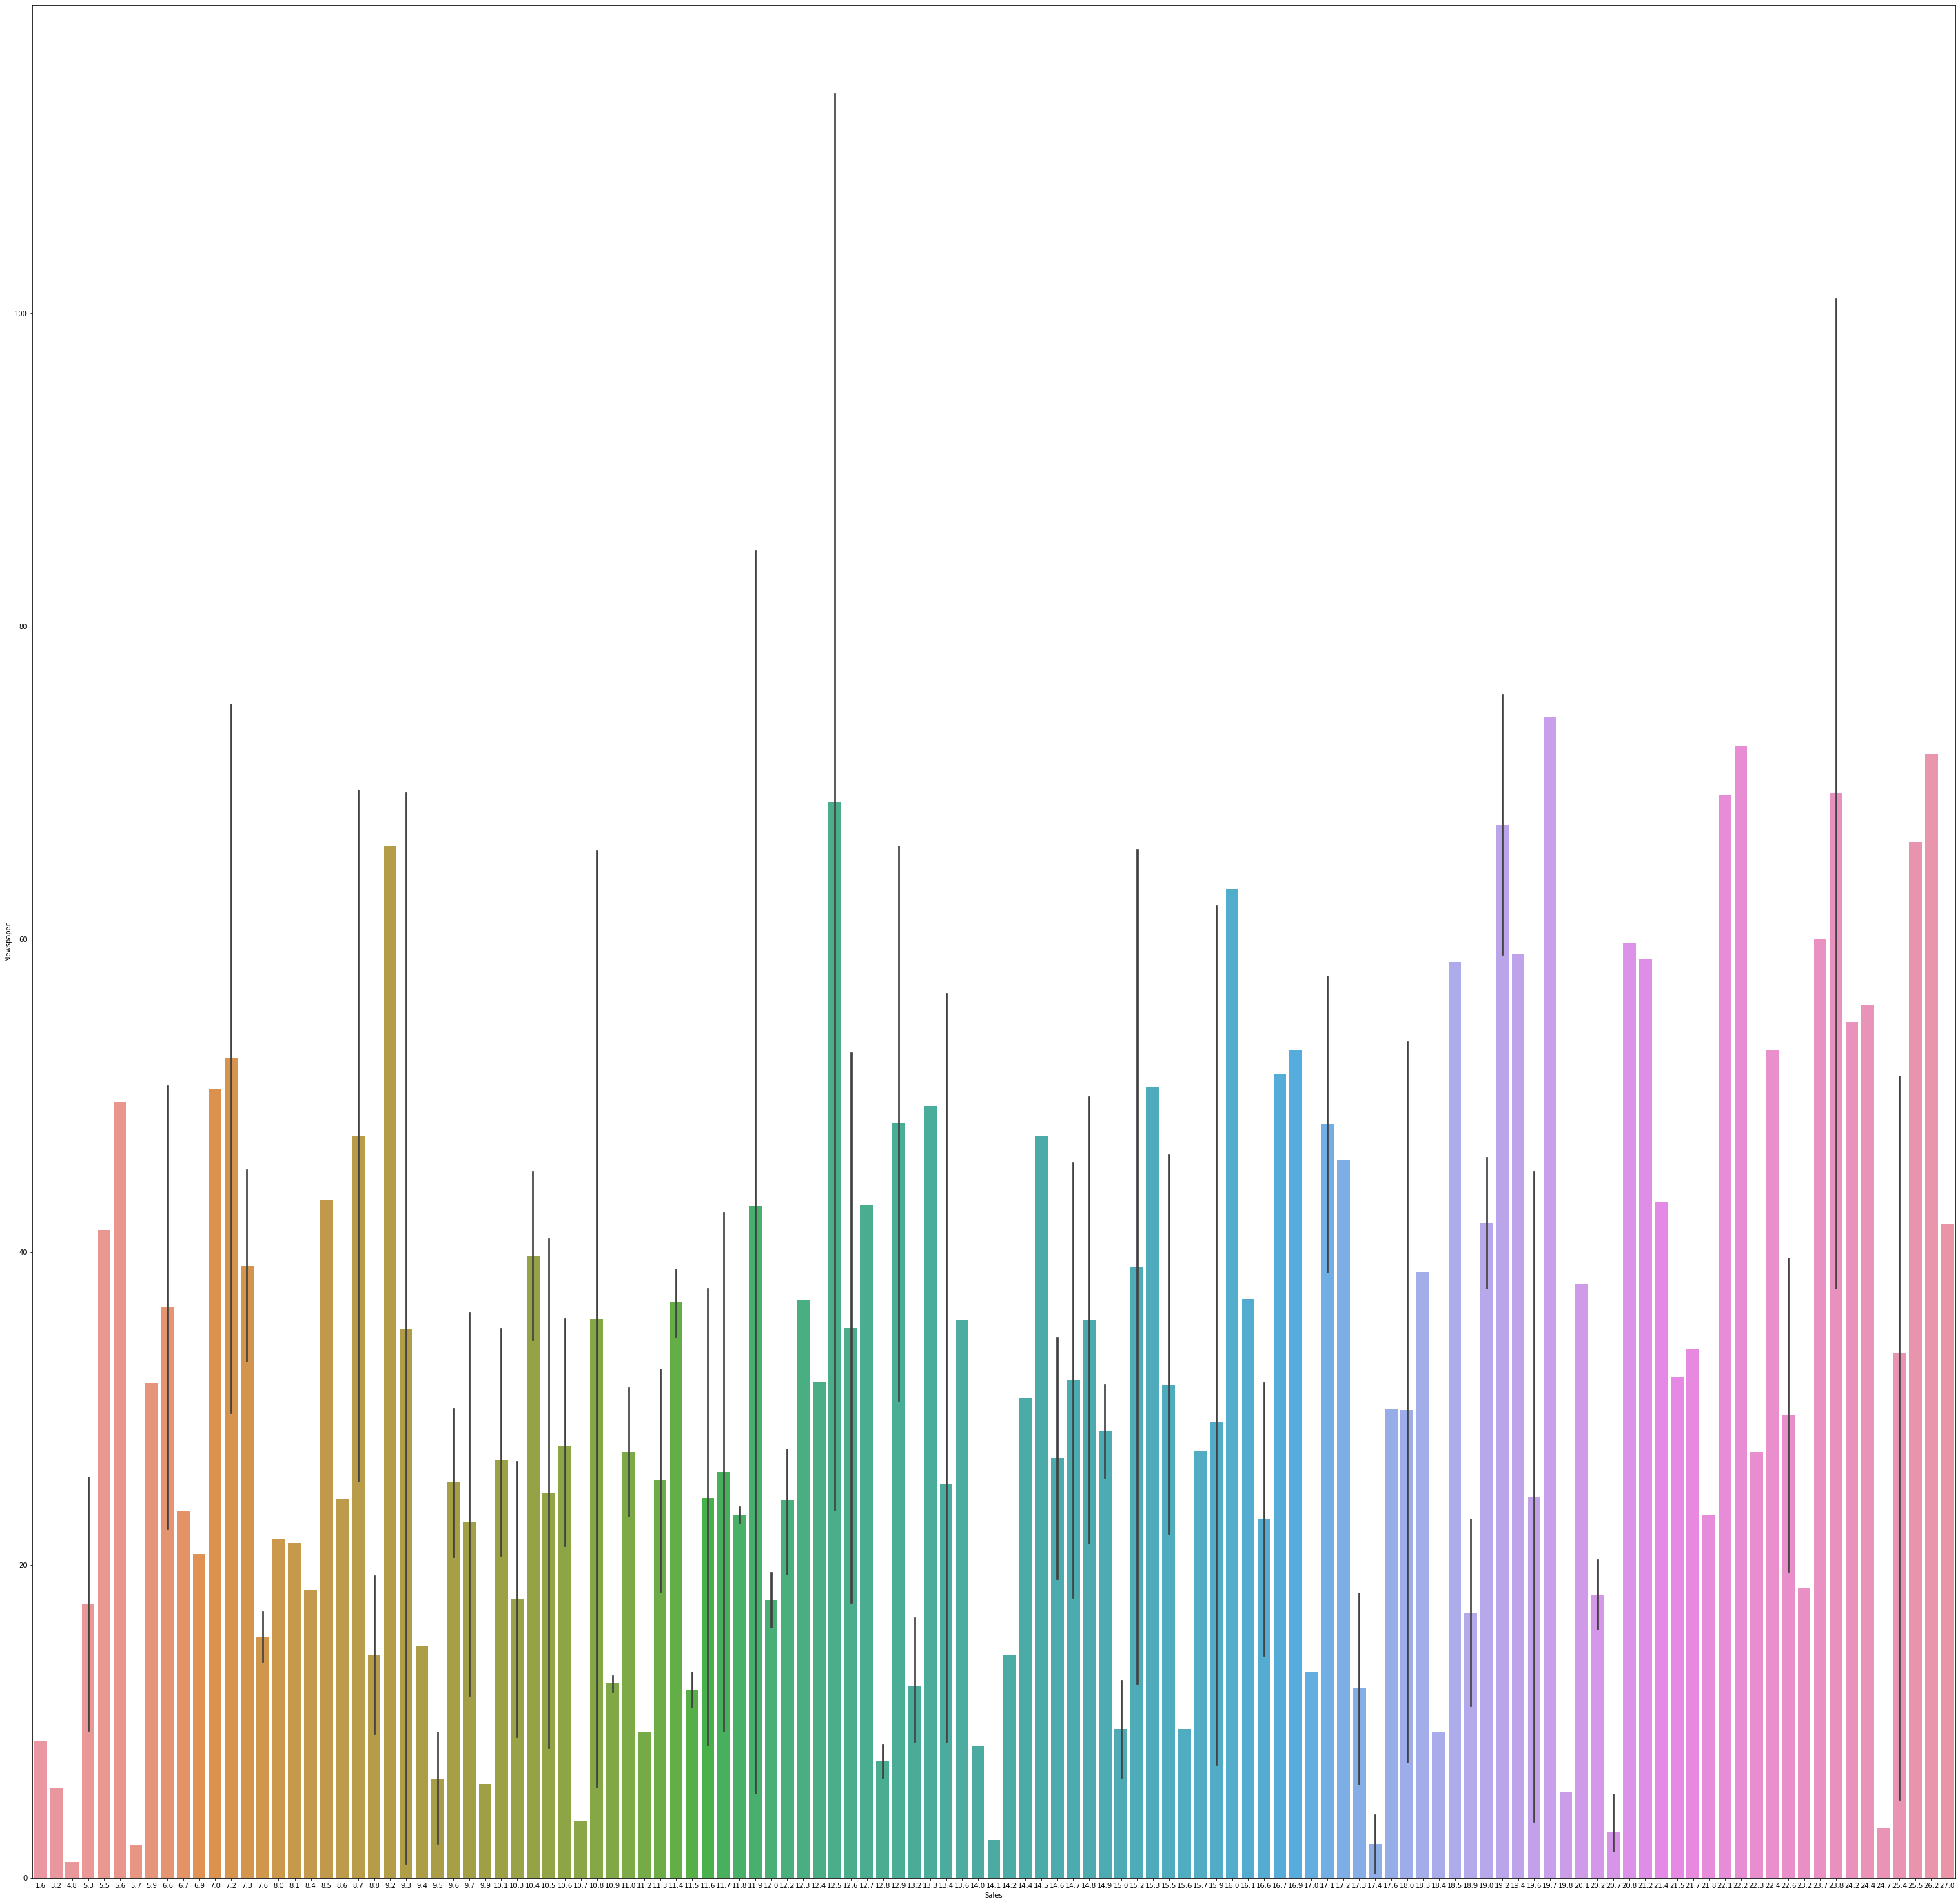

In [19]:
a=['TV', 'Radio', 'Newspaper']
for i in a:
    plt.figure(figsize=(50,50))
    sns.barplot(x="Sales",y=df[i],data=df);
    plt.show();

<Axes: >

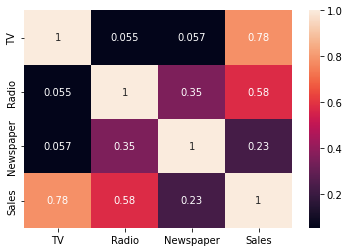

In [20]:
sns.heatmap(data=df.corr(),annot=True)

C:\Users\AMOL MORE\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


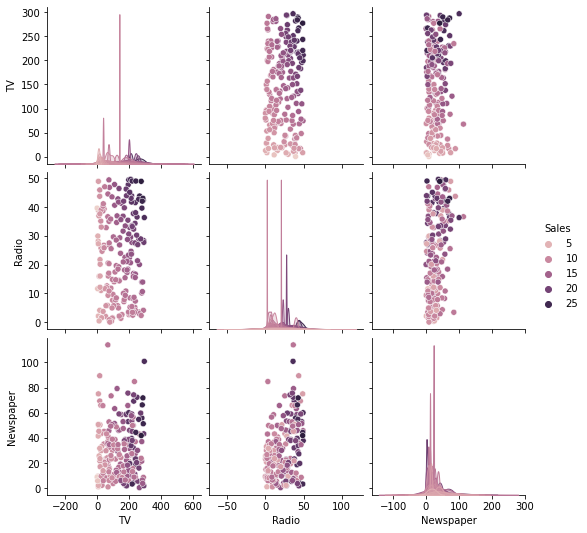

In [21]:
sns.pairplot(data=df,kind="scatter", hue="Sales");
plt.show();

In [22]:
a

['TV', 'Radio', 'Newspaper']

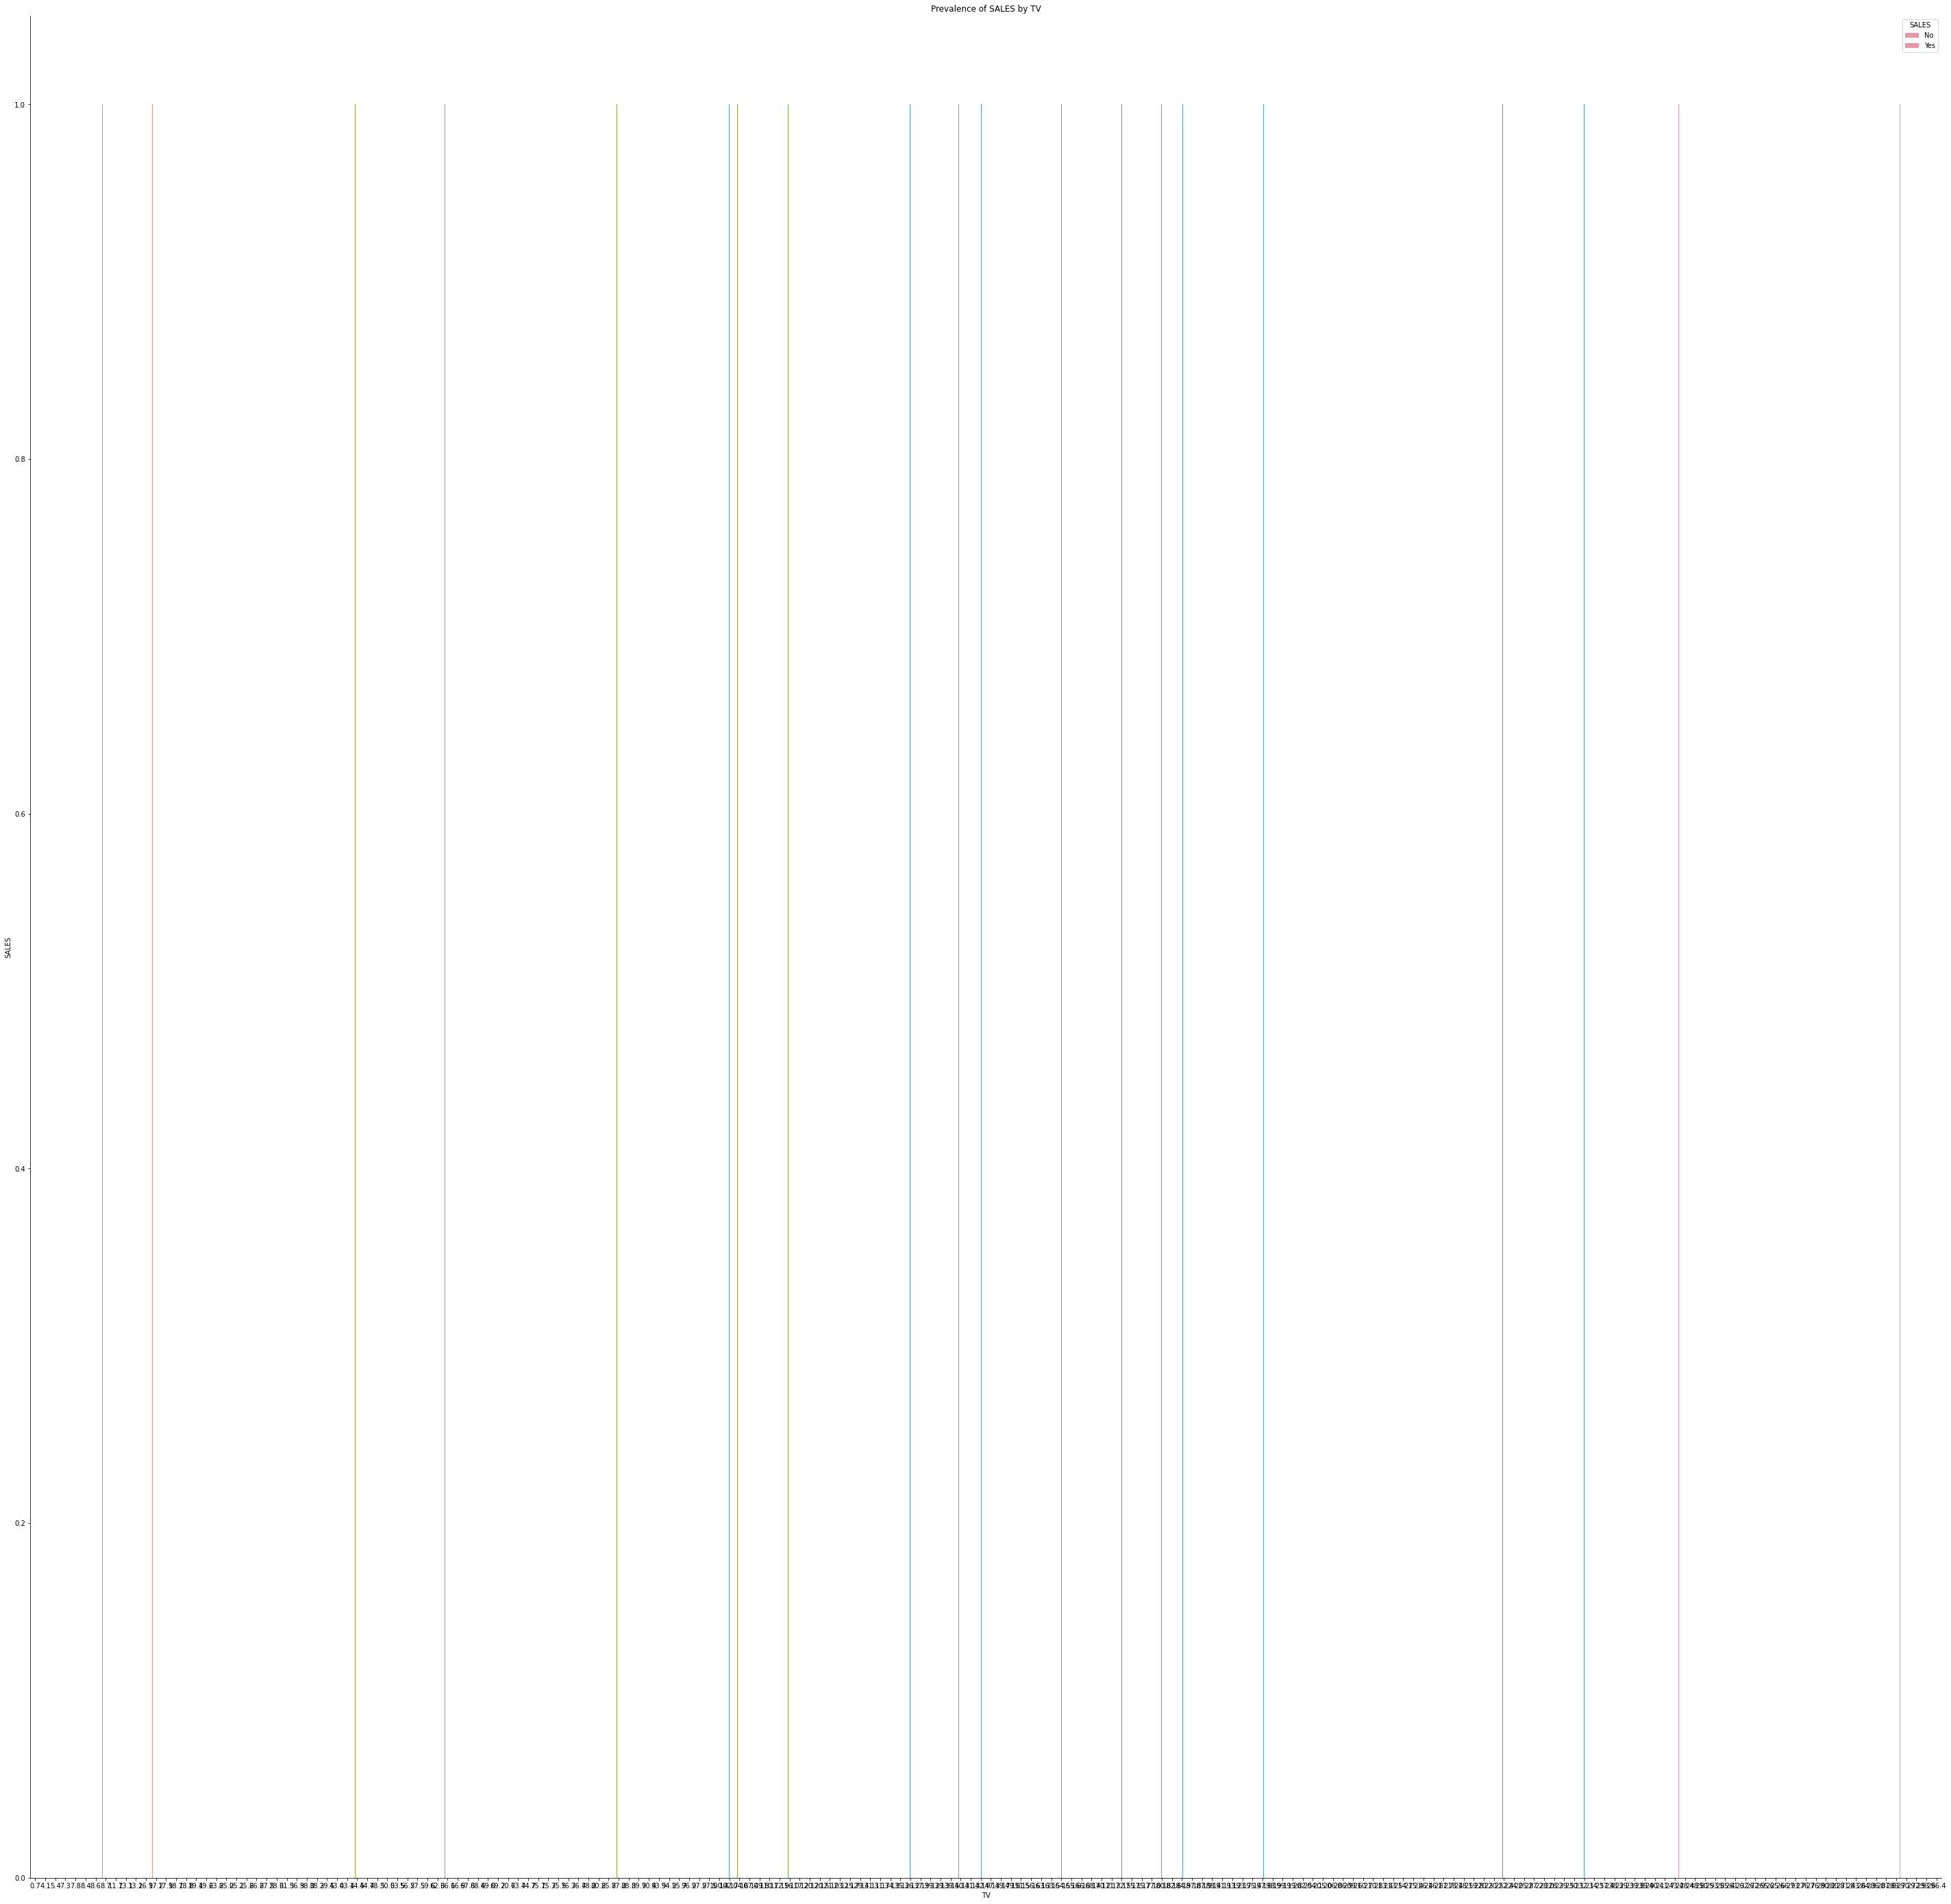

In [23]:
plt.figure(figsize=(50,50))
sns.countplot(data=df, x='TV', hue='Sales')
plt.xlabel('TV')
plt.ylabel('SALES')
plt.title('Prevalence of SALES by TV')
plt.legend(title='SALES', labels=['No', 'Yes'])
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

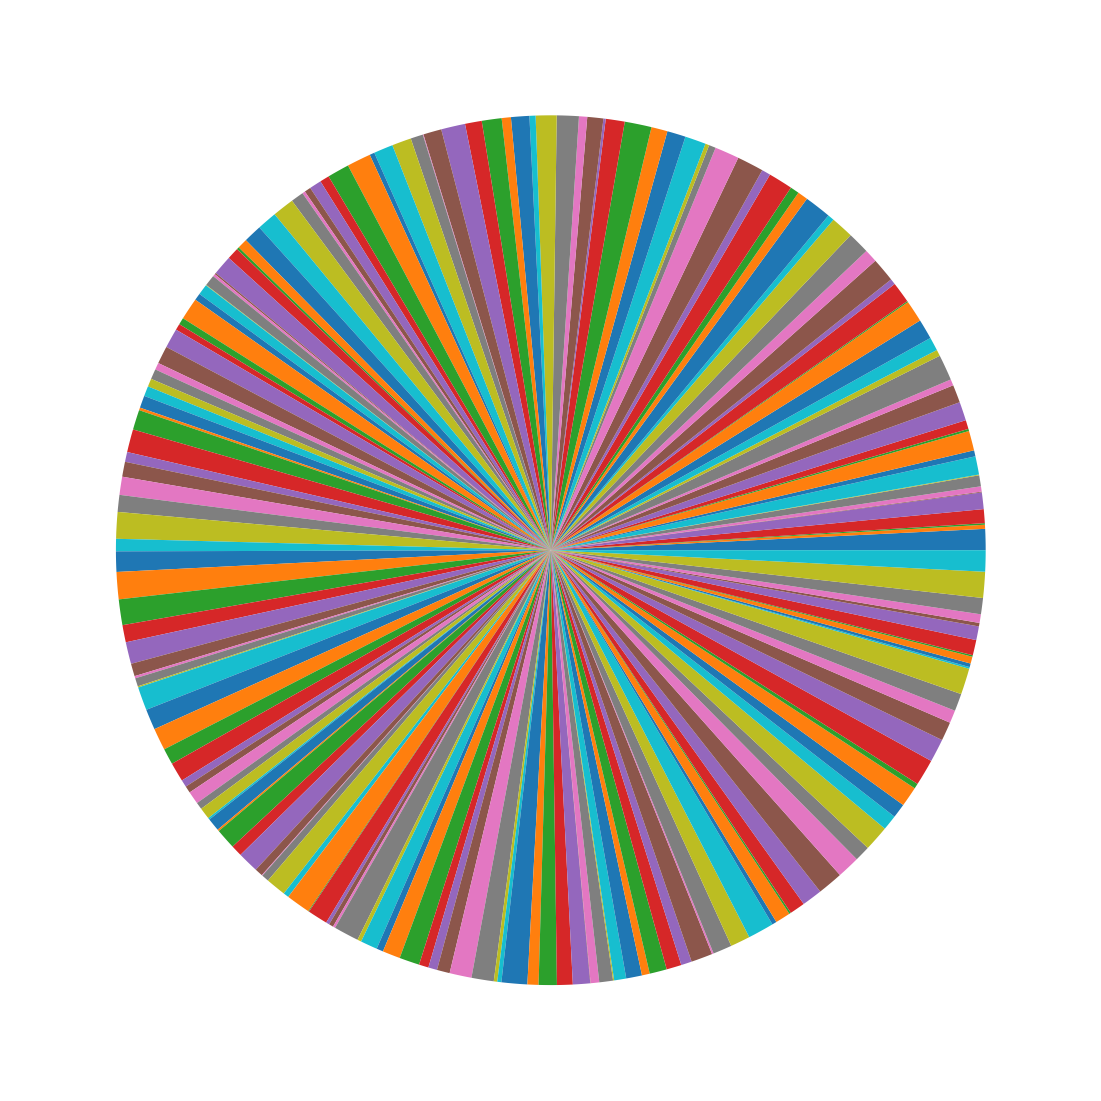

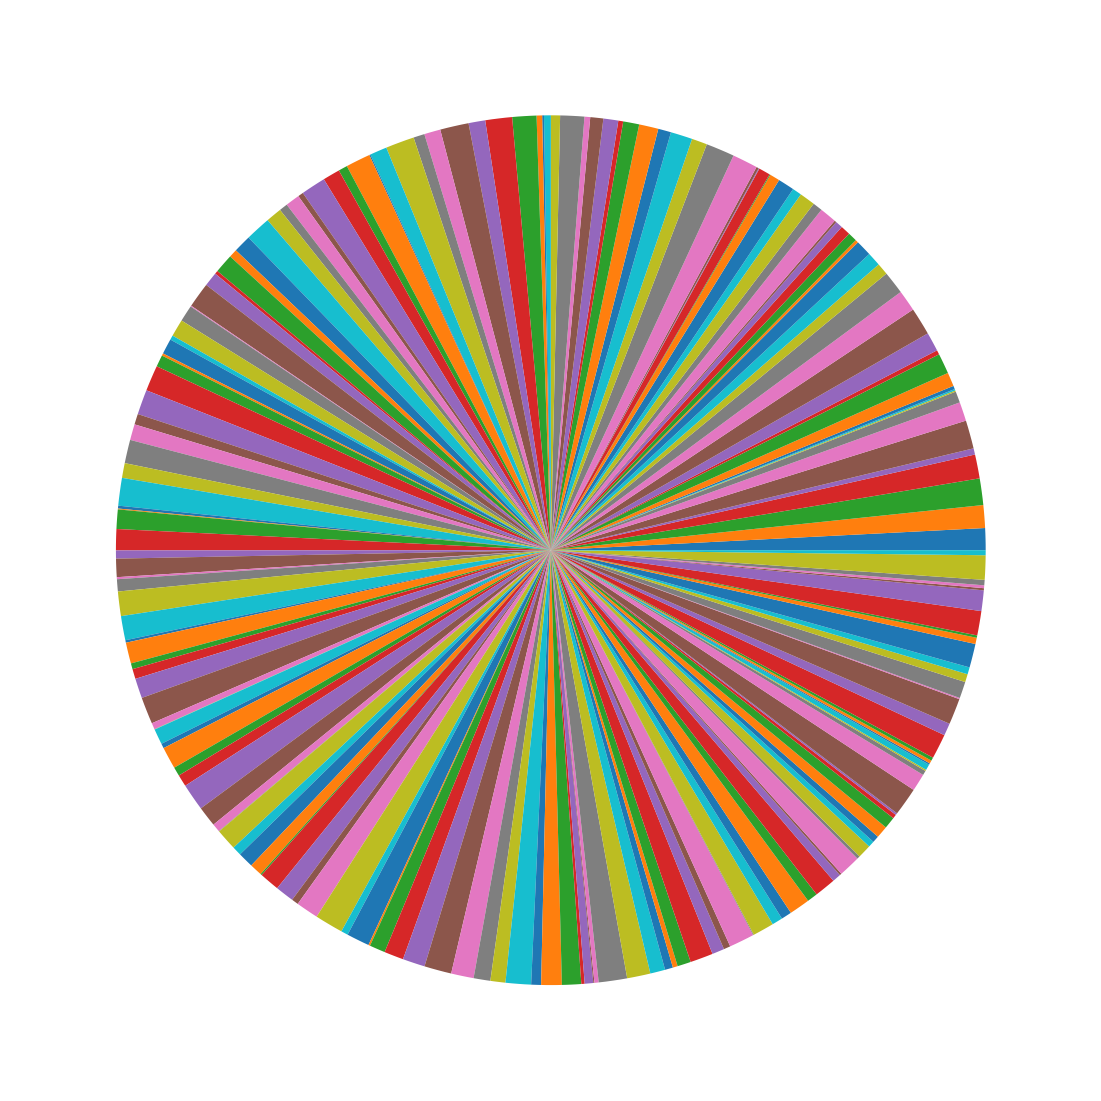

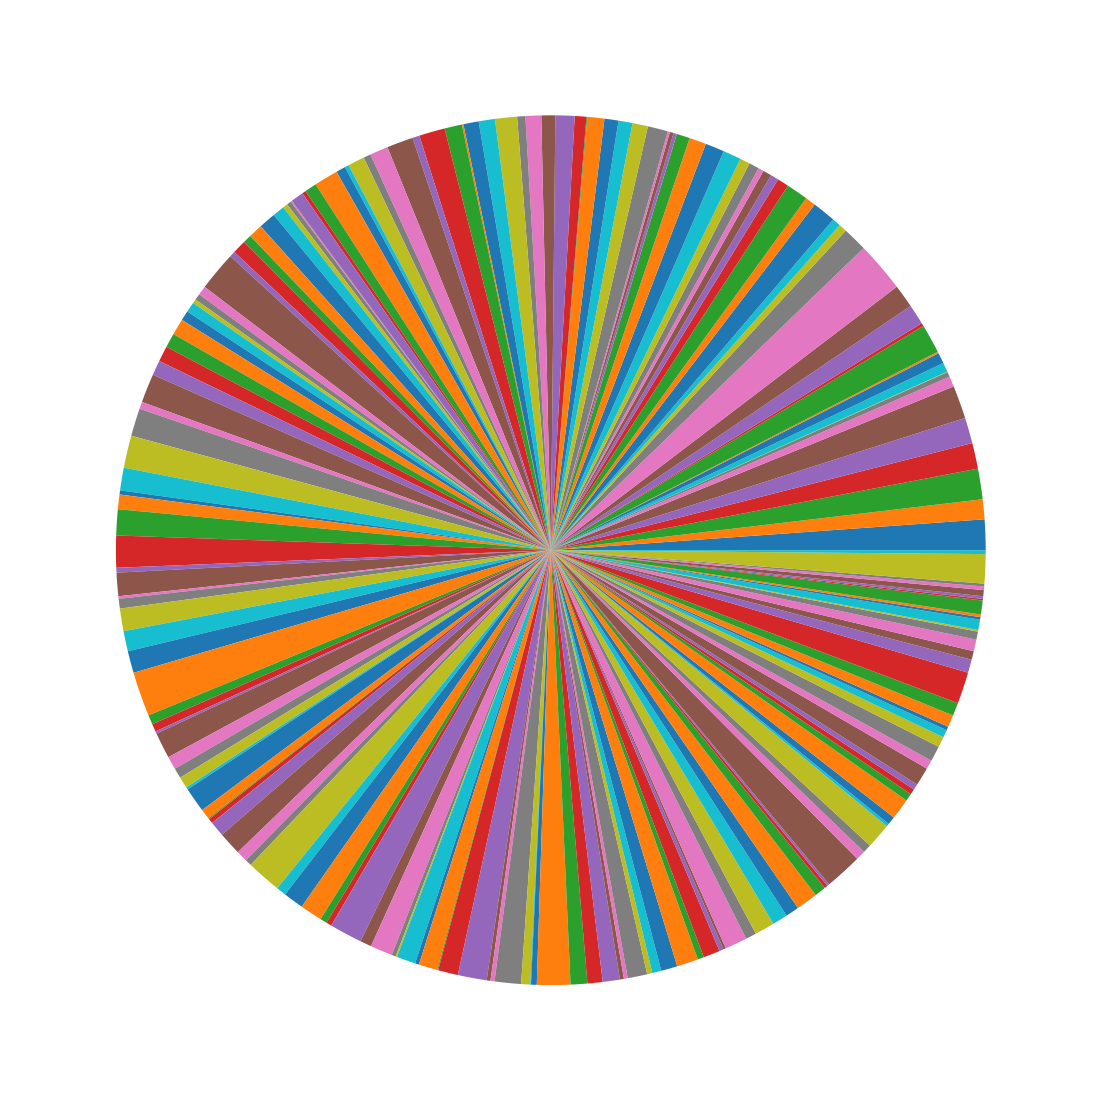

In [24]:
for i in a:
  plt.figure(figsize=(20,20))
  plt.pie(df[i])
  plt.show()

In [25]:
x=df.iloc[:,:-1].values

In [26]:
x

array([[230.1,  37.8,  69.2],
       [ 44.5,  39.3,  45.1],
       [ 17.2,  45.9,  69.3],
       [151.5,  41.3,  58.5],
       [180.8,  10.8,  58.4],
       [  8.7,  48.9,  75. ],
       [ 57.5,  32.8,  23.5],
       [120.2,  19.6,  11.6],
       [  8.6,   2.1,   1. ],
       [199.8,   2.6,  21.2],
       [ 66.1,   5.8,  24.2],
       [214.7,  24. ,   4. ],
       [ 23.8,  35.1,  65.9],
       [ 97.5,   7.6,   7.2],
       [204.1,  32.9,  46. ],
       [195.4,  47.7,  52.9],
       [ 67.8,  36.6, 114. ],
       [281.4,  39.6,  55.8],
       [ 69.2,  20.5,  18.3],
       [147.3,  23.9,  19.1],
       [218.4,  27.7,  53.4],
       [237.4,   5.1,  23.5],
       [ 13.2,  15.9,  49.6],
       [228.3,  16.9,  26.2],
       [ 62.3,  12.6,  18.3],
       [262.9,   3.5,  19.5],
       [142.9,  29.3,  12.6],
       [240.1,  16.7,  22.9],
       [248.8,  27.1,  22.9],
       [ 70.6,  16. ,  40.8],
       [292.9,  28.3,  43.2],
       [112.9,  17.4,  38.6],
       [ 97.2,   1.5,  30. ],
       [26

In [27]:
y=df.iloc[:,-1].values

In [28]:
y

array([22.1, 10.4,  9.3, 18.5, 12.9,  7.2, 11.8, 13.2,  4.8, 10.6,  8.6,
       17.4,  9.2,  9.7, 19. , 22.4, 12.5, 24.4, 11.3, 14.6, 18. , 12.5,
        5.6, 15.5,  9.7, 12. , 15. , 15.9, 18.9, 10.5, 21.4, 11.9,  9.6,
       17.4,  9.5, 12.8, 25.4, 14.7, 10.1, 21.5, 16.6, 17.1, 20.7, 12.9,
        8.5, 14.9, 10.6, 23.2, 14.8,  9.7, 11.4, 10.7, 22.6, 21.2, 20.2,
       23.7,  5.5, 13.2, 23.8, 18.4,  8.1, 24.2, 15.7, 14. , 18. ,  9.3,
        9.5, 13.4, 18.9, 22.3, 18.3, 12.4,  8.8, 11. , 17. ,  8.7,  6.9,
       14.2,  5.3, 11. , 11.8, 12.3, 11.3, 13.6, 21.7, 15.2, 12. , 16. ,
       12.9, 16.7, 11.2,  7.3, 19.4, 22.2, 11.5, 16.9, 11.7, 15.5, 25.4,
       17.2, 11.7, 23.8, 14.8, 14.7, 20.7, 19.2,  7.2,  8.7,  5.3, 19.8,
       13.4, 21.8, 14.1, 15.9, 14.6, 12.6, 12.2,  9.4, 15.9,  6.6, 15.5,
        7. , 11.6, 15.2, 19.7, 10.6,  6.6,  8.8, 24.7,  9.7,  1.6, 12.7,
        5.7, 19.6, 10.8, 11.6,  9.5, 20.8,  9.6, 20.7, 10.9, 19.2, 20.1,
       10.4, 11.4, 10.3, 13.2, 25.4, 10.9, 10.1, 16

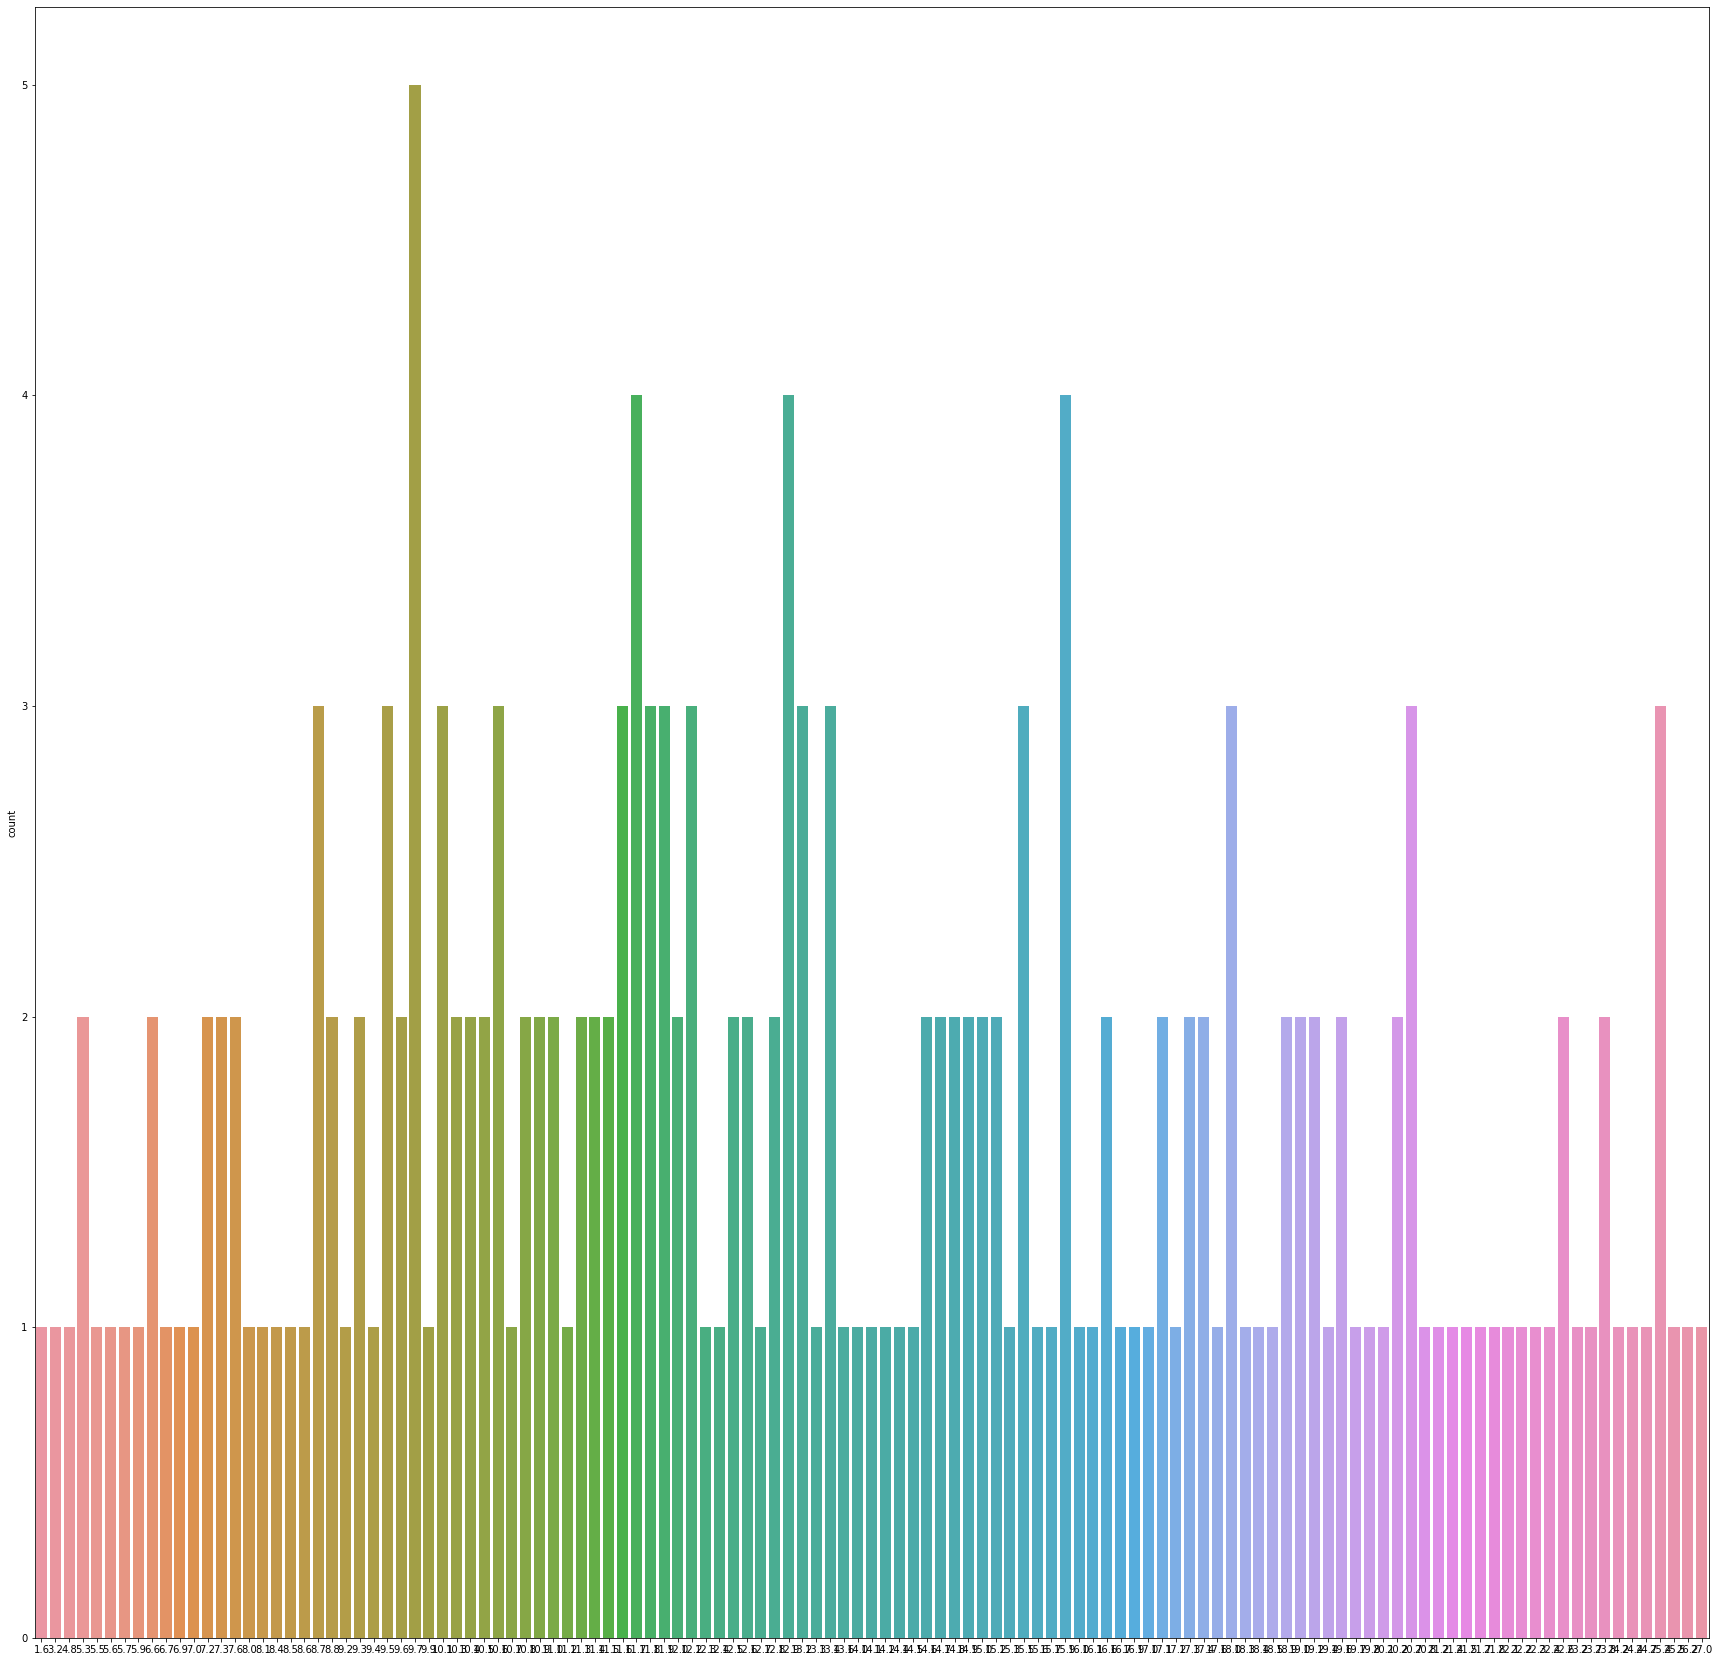

In [29]:
plt.figure(figsize=(30,30))
sns.countplot(x=y);

#### This is formatted as code

# APPLYING MACHINE LEARNING TO OUR DATASET

In [30]:
le = LabelEncoder()
df["Sales"]=le.fit_transform(df["Sales"])

In [31]:
df['Sales'].nunique()

121

In [32]:
x=df.iloc[:,:-1].values

In [33]:
y=df.iloc[:,-1].values

<Axes: ylabel='count'>

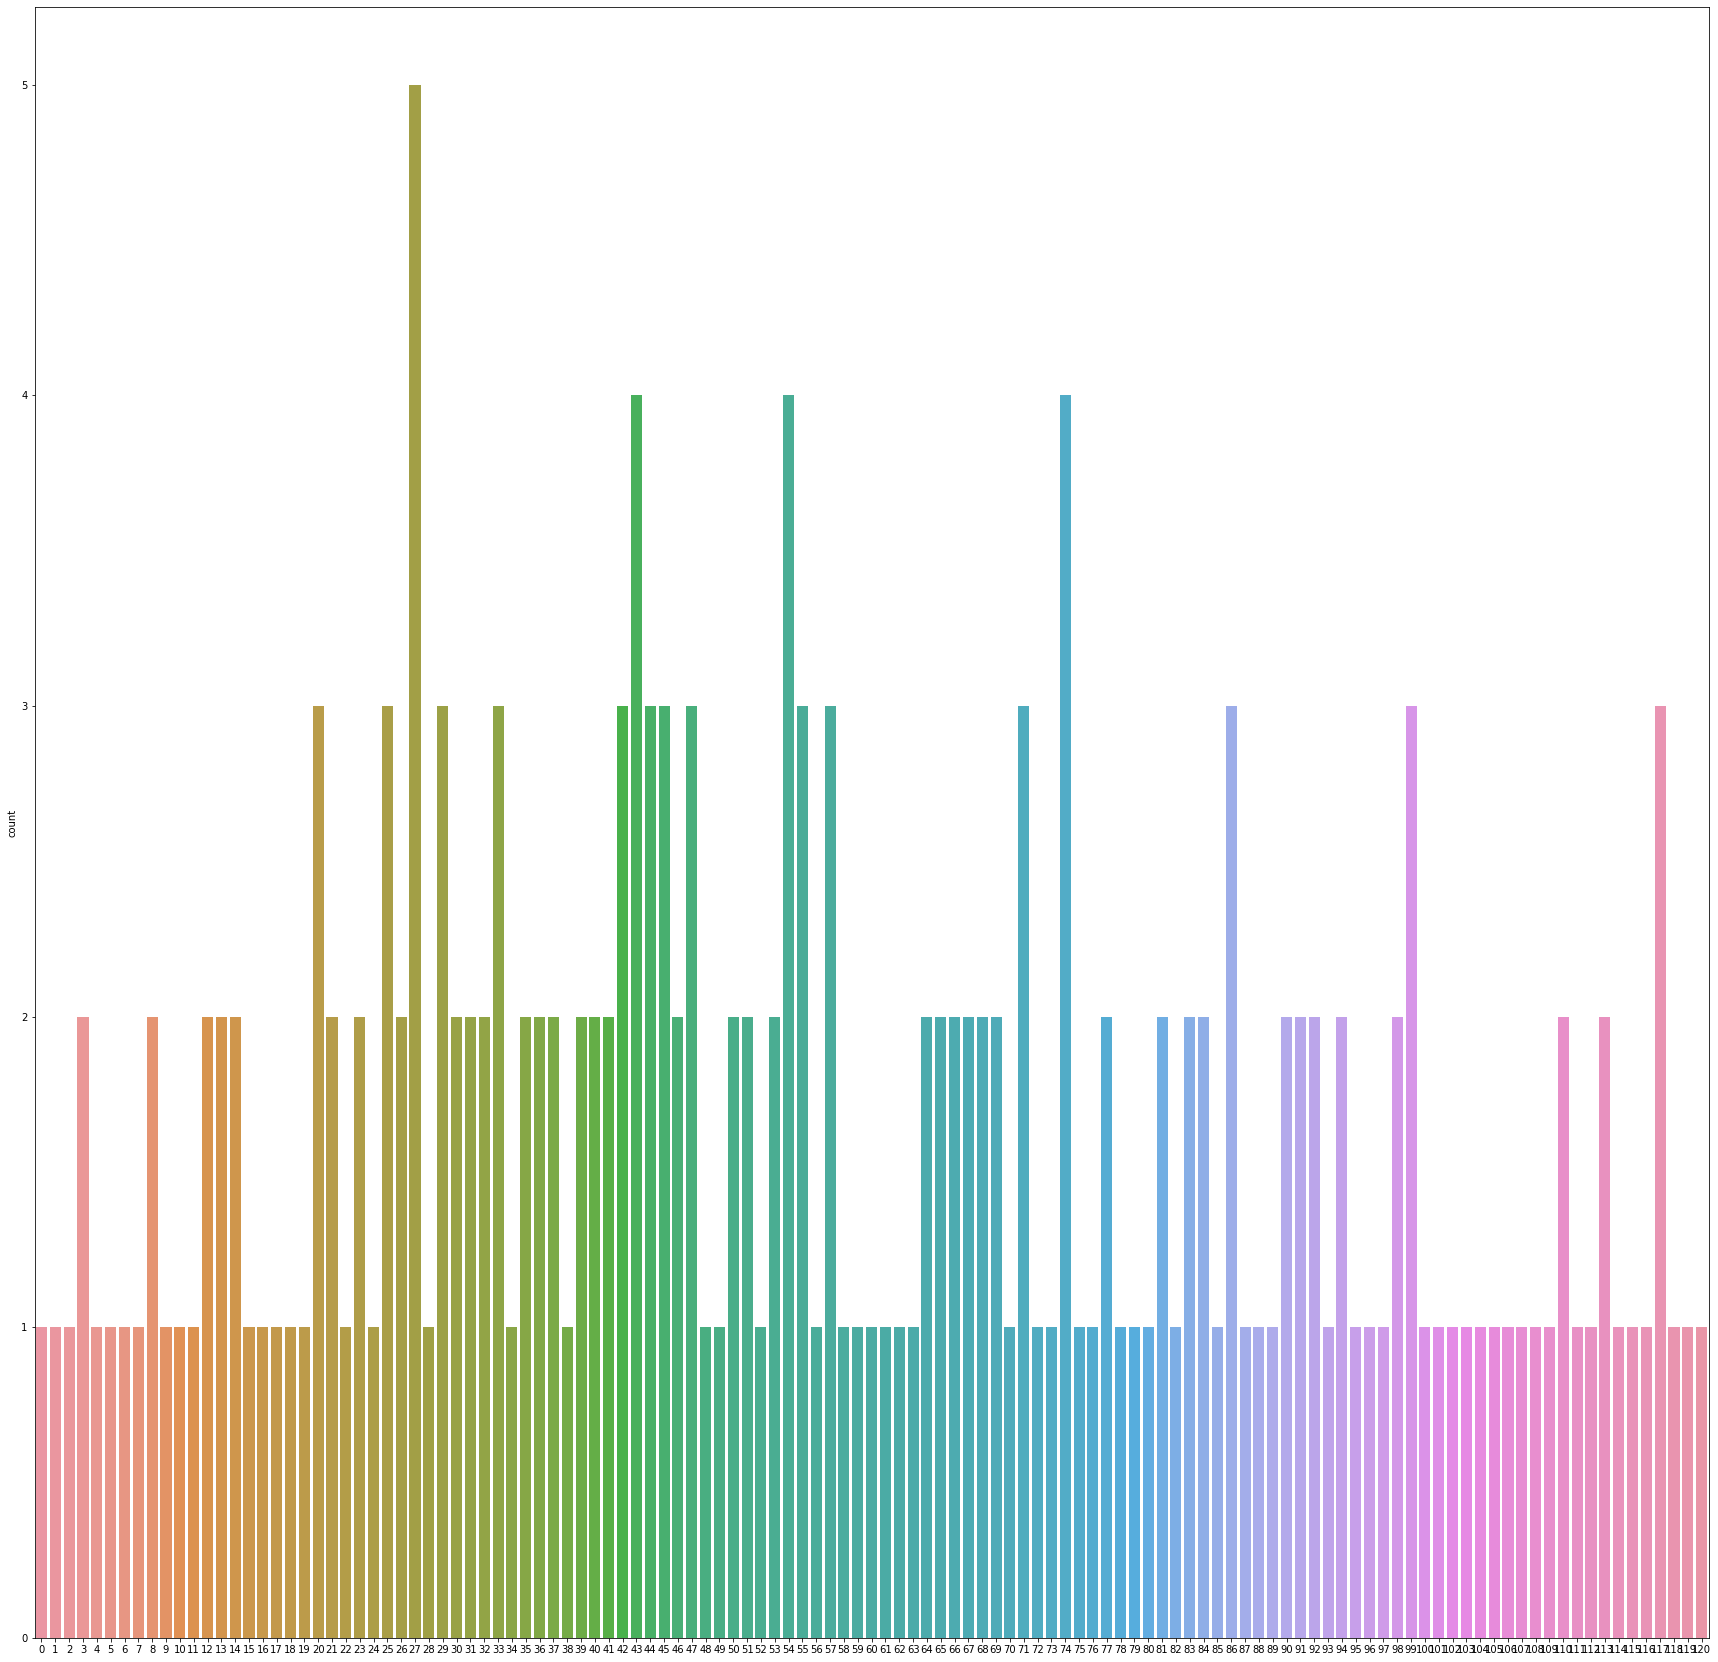

In [34]:
plt.figure(figsize=(30,30))
sns.countplot(x=y)

In [35]:
over_sampler = RandomOverSampler()

In [36]:
x,y = over_sampler.fit_resample(x,y)

<Axes: ylabel='count'>

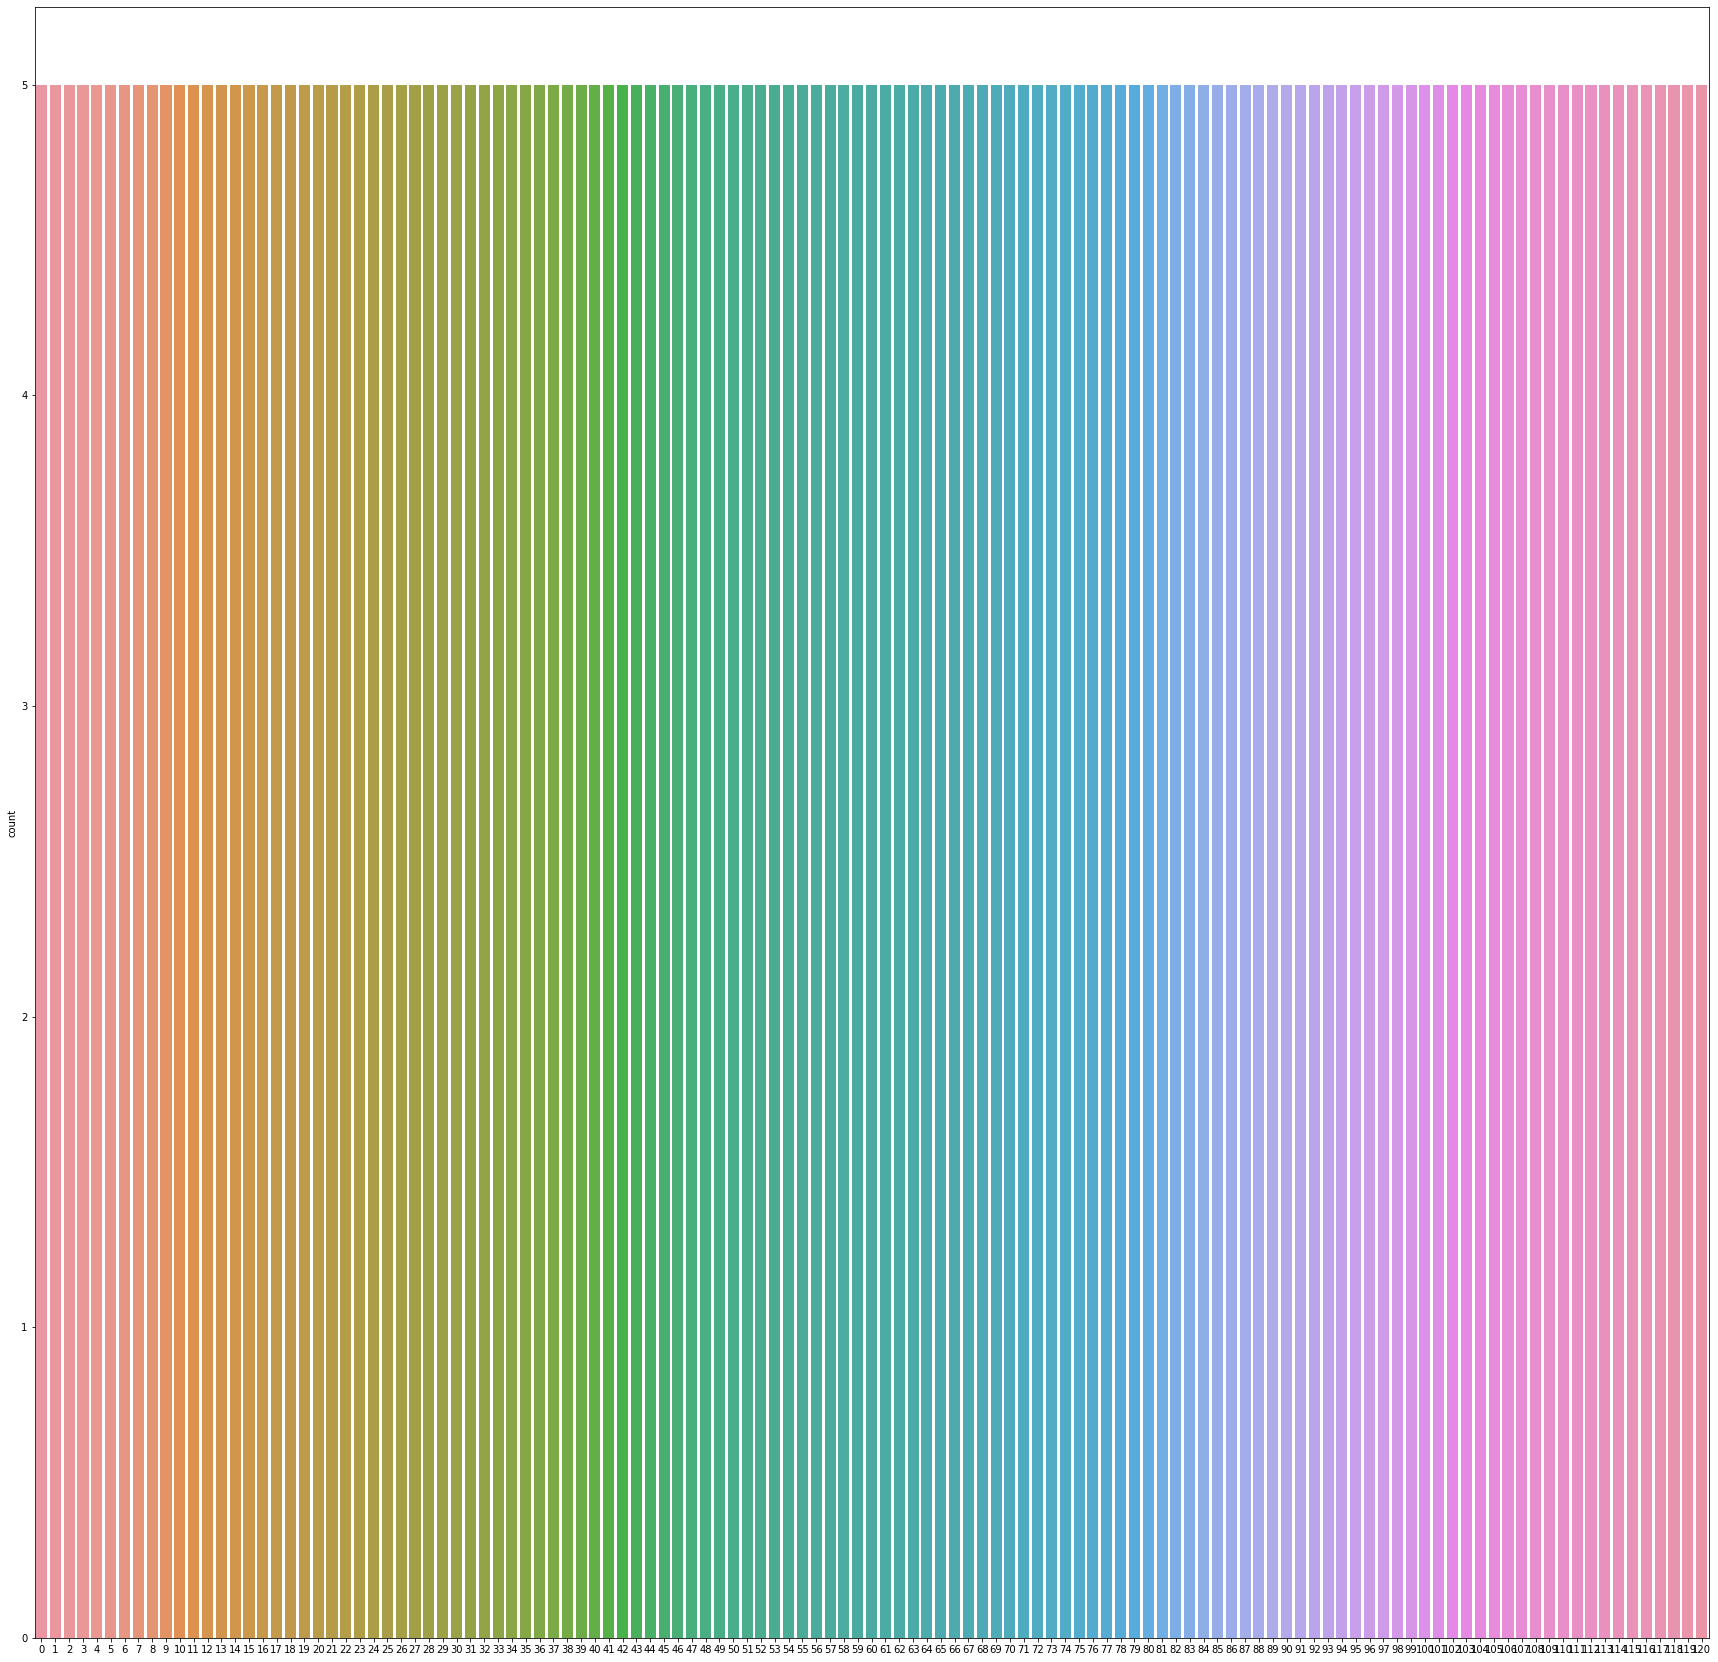

In [37]:
plt.figure(figsize=(30,30))
sns.countplot(x=y)

In [38]:
len(x)

605

In [39]:
len(y)

605

In [40]:
sc=StandardScaler()

In [41]:
x=sc.fit_transform(x)

In [42]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [43]:
model=RandomForestClassifier()
model.fit(x_train, y_train)
print("model trained with {}".format(model))
score_train =accuracy_score (y_train, model.predict(x_train))
score_tst = accuracy_score(y_test, model.predict(x_test))
con_train = confusion_matrix(y_train, model.predict(x_train))
con_test = confusion_matrix(y_test, model.predict(x_test))
print("Model accuracy on train is:: ",score_train)
print("Model accuracy on test is:: ", score_tst)
print("confusion_matrix train is:: ", con_train)
print("confusion_matrix test is:: ", con_test)
print("Wrong Predictions made:",(y_test !=model.predict(x_test)).sum())
print("*"*60)

model trained with RandomForestClassifier()
Model accuracy on train is::  1.0
Model accuracy on test is::  0.9008264462809917
confusion_matrix train is::  [[5 0 0 ... 0 0 0]
 [0 3 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 4 0]
 [0 0 0 ... 0 0 4]]
confusion_matrix test is::  [[2 0 0 ... 0 0 0]
 [0 4 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
Wrong Predictions made: 12
************************************************************


In [44]:
model=LGBMClassifier()
model.fit(x_train, y_train)
print("model trained with {}".format(model))
score_train =accuracy_score (y_train, model.predict(x_train))
score_tst = accuracy_score(y_test, model.predict(x_test))
con_train = confusion_matrix(y_train, model.predict(x_train))
con_test = confusion_matrix(y_test, model.predict(x_test))
print("Model accuracy on train is:: ",score_train)
print("Model accuracy on test is:: ", score_tst)
print("confusion_matrix train is:: ", con_train)
print("confusion_matrix test is:: ", con_test)
print("Wrong Predictions made:",(y_test !=model.predict(x_test)).sum())
print("*"*60)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000073 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 326
[LightGBM] [Info] Number of data points in the train set: 484, number of used features: 3
[LightGBM] [Info] Start training from score -4.572647
[LightGBM] [Info] Start training from score -5.083473
[LightGBM] [Info] Start training from score -6.182085
[LightGBM] [Info] Start training from score -4.795791
[LightGBM] [Info] Start training from score -4.572647
[LightGBM] [Info] Start training from score -4.572647
[LightGBM] [Info] Start training from score -4.572647
[LightGBM] [Info] Start training from score -4.795791
[LightGBM] [Info] Start training from score -4.795791
[LightGBM] [Info] Start training from score -4.572647
[LightGBM] [Info] Start training from score -5.083473
[LightGBM] [Info] Start training from score -4.795791
[LightGBM] [Info] Start training from score -4.795791
[LightGBM]

In [45]:
model=XGBClassifier()
model.fit(x_train, y_train)
#print("model trained with {}".format(model))
score_train =accuracy_score (y_train, model.predict(x_train))
score_tst = accuracy_score(y_test, model.predict(x_test))
con_train = confusion_matrix(y_train, model.predict(x_train))
con_test = confusion_matrix(y_test, model.predict(x_test))
print("Model accuracy on train is:: ",score_train)
print("Model accuracy on test is:: ", score_tst)
print("confusion_matrix train is:: ", con_train)
print("confusion_matrix test is:: ", con_test)
print("Wrong Predictions made:",(y_test !=model.predict(x_test)).sum())
print("*"*60)

Model accuracy on train is::  0.9979338842975206
Model accuracy on test is::  0.8925619834710744
confusion_matrix train is::  [[5 0 0 ... 0 0 0]
 [0 3 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 4 0]
 [0 0 0 ... 0 0 4]]
confusion_matrix test is::  [[2 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
Wrong Predictions made: 13
************************************************************


In [46]:
OUTPUT= pd.DataFrame(zip(y,model.predict(x)), columns=("ACTUAL", "PREDICTION"))
OUTPUT.sample(10)

,ACTUAL,PREDICTION
393,61,61
85,69,69
404,63,63
31,45,45
240,10,10
537,103,103
551,106,106
430,72,72
42,99,99
541,104,104


In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import metrics

In [48]:
x=df.iloc[:,:-1].values

In [49]:
y=df.iloc[:,-1].values

In [50]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0,shuffle=True)

In [51]:
linearRegression = LinearRegression()
linearRegression.fit(X_train,y_train)
predictions = linearRegression.predict(X_test)
print(r2_score(y_test,predictions))

0.9106896484853788


In [52]:
x

array([[230.1,  37.8,  69.2],
       [ 44.5,  39.3,  45.1],
       [ 17.2,  45.9,  69.3],
       [151.5,  41.3,  58.5],
       [180.8,  10.8,  58.4],
       [  8.7,  48.9,  75. ],
       [ 57.5,  32.8,  23.5],
       [120.2,  19.6,  11.6],
       [  8.6,   2.1,   1. ],
       [199.8,   2.6,  21.2],
       [ 66.1,   5.8,  24.2],
       [214.7,  24. ,   4. ],
       [ 23.8,  35.1,  65.9],
       [ 97.5,   7.6,   7.2],
       [204.1,  32.9,  46. ],
       [195.4,  47.7,  52.9],
       [ 67.8,  36.6, 114. ],
       [281.4,  39.6,  55.8],
       [ 69.2,  20.5,  18.3],
       [147.3,  23.9,  19.1],
       [218.4,  27.7,  53.4],
       [237.4,   5.1,  23.5],
       [ 13.2,  15.9,  49.6],
       [228.3,  16.9,  26.2],
       [ 62.3,  12.6,  18.3],
       [262.9,   3.5,  19.5],
       [142.9,  29.3,  12.6],
       [240.1,  16.7,  22.9],
       [248.8,  27.1,  22.9],
       [ 70.6,  16. ,  40.8],
       [292.9,  28.3,  43.2],
       [112.9,  17.4,  38.6],
       [ 97.2,   1.5,  30. ],
       [26

In [53]:
linearRegression.predict([[200,50,200]])

array([101.63634516])

In [54]:
linearRegression.score(X_train,y_train)

0.9139331247300001

In [55]:
linearRegression.score(X_test,y_test)

0.9106896484853788

In [56]:
metrics.mean_absolute_error(y_test,predictions)

6.755252766356165

In [57]:
metrics.mean_squared_error(y_test,predictions)

101.27877590212583

In [58]:
RF=RandomForestRegressor()
RF.fit(X_train,y_train)
print('train accuracy: ',np.round(RF.score(X_train,y_train),3)*100,'% \n')
print('test accuracy: ',np.round(RF.score(X_test,y_test),3)*100,'% \n')
predictions =RF.predict(X_test)
print(r2_score(y_test,predictions))

train accuracy:  99.7 % 

test accuracy:  97.89999999999999 % 

0.9789909386772045


In [59]:
xg=XGBRegressor()
xg.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [60]:
print('train accuracy: ',np.round(xg.score(X_train,y_train),3)*100,'% \n')
print('test accuracy: ',np.round(xg.score(X_test,y_test),3)*100,'% \n')
predictions =xg.predict(X_test)
print(r2_score(y_test,predictions))

train accuracy:  100.0 % 

test accuracy:  97.8 % 

0.9783698286984656


In [61]:
OUTPUT= pd.DataFrame(zip(y,RF.predict(x)), columns=("ACTUAL", "PREDICTION"))
OUTPUT.sample(10)

,ACTUAL,PREDICTION
146,55,51.86
42,99,98.08
106,12,12.87
85,69,68.47
144,40,39.88
116,47,50.08
5,12,14.34
101,113,110.70
198,118,116.71
86,46,44.08


In [62]:
z=y,RF.predict(x)

In [63]:
for i in range(len(y)):
  print(z[0][i],z[1][i])

106 105.67
31 34.06
23 21.0
89 87.56
54 60.39
12 14.34
44 40.3
55 48.88
2 2.82
33 36.15
19 20.85
84 82.04
22 19.82
27 27.4
91 89.66
109 105.44
50 46.15
115 113.7
39 32.68
64 67.64
86 87.37
50 48.97
5 7.29
71 69.96
27 27.36
46 46.72
68 70.91
74 72.58
90 91.87
32 32.96
102 100.15
45 47.58
26 26.38
84 73.66
25 25.29
53 50.59
117 116.5
65 55.47
29 29.5
103 104.27
77 77.6
81 83.5
99 98.08
54 54.02
18 15.32
67 72.75
33 32.0
111 110.95
66 67.52
27 28.35
40 40.74
34 33.56
110 106.78
101 99.19
98 97.32
112 107.97
4 5.97
55 54.94
113 110.47
88 87.77
16 20.45
114 115.34
73 71.64
59 53.83
86 81.13
23 24.8
25 21.07
57 54.6
90 91.57
108 107.58
87 87.2
49 47.16
21 18.45
37 37.49
80 82.25
20 20.02
10 11.5
61 60.54
3 3.64
37 37.91
44 42.67
48 47.92
39 39.32
58 48.38
104 104.6
69 68.47
46 44.08
75 74.19
54 52.06
78 74.79
38 39.07
13 12.57
93 92.44
107 106.98
41 41.89
79 80.87
43 42.64
71 70.4
117 116.95
82 82.08
43 44.59
113 110.7
66 64.64
65 66.16
99 97.99
92 89.62
12 12.87
20 25.14
3 4.86
96 94.48
57 

In [64]:
sum=0
for i in range(len(y)):
  sum=sum+(z[0][i]-z[1][i])**2
print(((sum)**1/2)/len(y))

3.535686749999999
